In [2]:
import numpy as np
import os
# from src import dataOrganizer as org

from matplotlib import pyplot as plt
import tensorflow as tf

2023-11-26 22:04:20.913551: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 22:04:20.917177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2023-11-26 22:04:20.917190: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data_dir = '/home/fizzer/enph_ws/src/immitation_learning/data'

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/paved_track',
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(72, 128),
    color_mode='rgb',
    batch_size=20)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/paved_track',
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(72, 128),
    color_mode='rgb',
    batch_size=20)

Found 7607 files belonging to 3 classes.
Using 6847 files for training.
Found 7607 files belonging to 3 classes.
Using 760 files for validation.


In [13]:
# Define the CNN model 
paved_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 4 output classes: left, right, forward, stop
])

# Compile the model
paved_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print the model summary
paved_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_9 (Conv2D)           (None, 70, 126, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 33, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 28, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1605696   
          

In [14]:
history = paved_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
343/343 [==============================] - 17s 48ms/step - loss: 2.3407 - accuracy: 0.6800 - val_loss: 0.6191 - val_accuracy: 0.7303
Epoch 2/20
343/343 [==============================] - 17s 51ms/step - loss: 0.5228 - accuracy: 0.7408 - val_loss: 0.5516 - val_accuracy: 0.7487
Epoch 3/20
343/343 [==============================] - 18s 53ms/step - loss: 0.4800 - accuracy: 0.7590 - val_loss: 0.5044 - val_accuracy: 0.7500
Epoch 4/20
343/343 [==============================] - 18s 54ms/step - loss: 0.4467 - accuracy: 0.7819 - val_loss: 0.5059 - val_accuracy: 0.7421
Epoch 5/20
343/343 [==============================] - 18s 52ms/step - loss: 0.4359 - accuracy: 0.7888 - val_loss: 0.4735 - val_accuracy: 0.7592
Epoch 6/20
343/343 [==============================] - 18s 53ms/step - loss: 0.4125 - accuracy: 0.8006 - val_loss: 0.4648 - val_accuracy: 0.7697
Epoch 7/20
343/343 [==============================] - 18s 52ms/step - loss: 0.3766 - accuracy: 0.8215 - val_loss: 0.4607 - val_accuracy:

In [15]:
# Save the model
paved_model.save('paved_track_model1.h5')
# save the history
np.save('paved_track_history1.npy', history.history)

Text(0, 0.5, 'Loss')

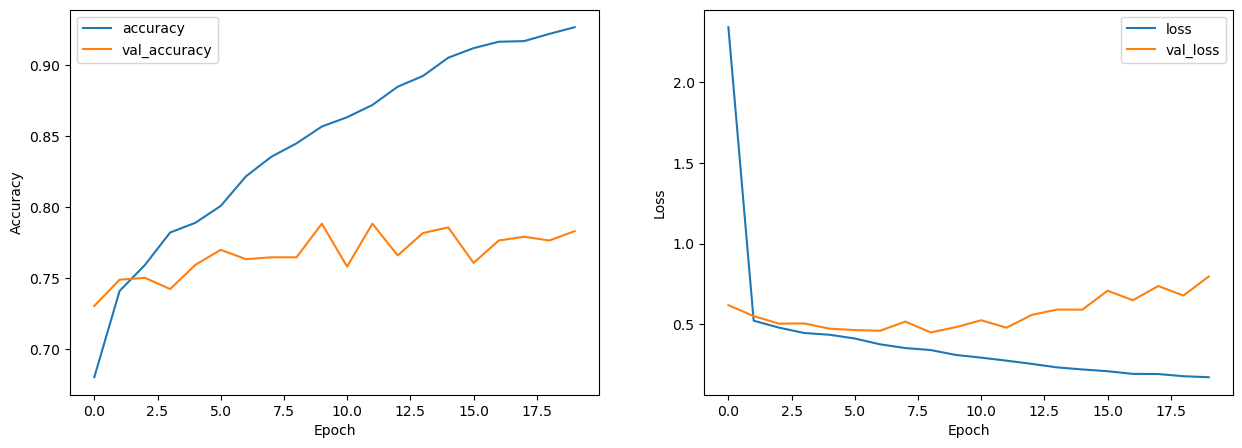

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the training history with figure size and in two diff plots for accuracy and loss
history = np.load('/home/fizzer/enph_ws/src/immitation_learning/models/paved_track_history1.npy', allow_pickle='TRUE').item()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [4]:
train_ds2 = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/dirt_track',
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(72, 128),
    color_mode='rgb',
    batch_size=20)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/dirt_track',
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(72, 128),
    color_mode='rgb',
    batch_size=20)

Found 9221 files belonging to 3 classes.
Using 8299 files for training.


2023-11-26 22:04:36.715013: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-11-26 22:04:36.715062: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (skynet): /proc/driver/nvidia/version does not exist
2023-11-26 22:04:36.715826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 9221 files belonging to 3 classes.
Using 922 files for validation.


(20, 72, 128, 3)


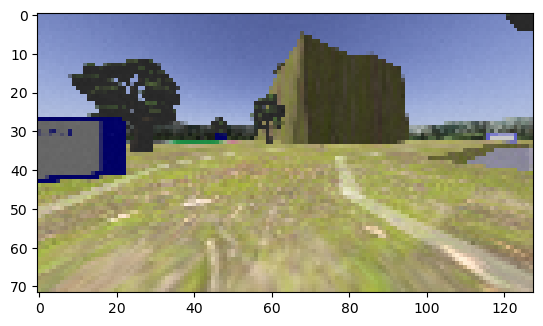

In [26]:
#  print the shape of a sample in the validation dataset
for images, labels in val_ds2.take(1):
    print(images.shape) 
plt.imshow(images[0].numpy().astype("uint8"))

In [11]:
# Define the CNN model 
dirt_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 4 output classes: left, right, forward, stop
])

# Compile the model
dirt_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print the model summary
dirt_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 70, 126, 32)       896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 25088)            

In [12]:
dirt_history = dirt_model.fit(
    train_ds2,
    validation_data=val_ds2,
    epochs=20
)

Epoch 1/20
415/415 [==============================] - 24s 56ms/step - loss: 2.2091 - accuracy: 0.5393 - val_loss: 0.9443 - val_accuracy: 0.5553
Epoch 2/20
415/415 [==============================] - 26s 61ms/step - loss: 0.9617 - accuracy: 0.5410 - val_loss: 0.9405 - val_accuracy: 0.5531
Epoch 3/20
415/415 [==============================] - 26s 63ms/step - loss: 0.9570 - accuracy: 0.5421 - val_loss: 0.9393 - val_accuracy: 0.5553
Epoch 4/20
415/415 [==============================] - 27s 65ms/step - loss: 0.9562 - accuracy: 0.5440 - val_loss: 0.9413 - val_accuracy: 0.5542
Epoch 5/20
415/415 [==============================] - 27s 66ms/step - loss: 0.8544 - accuracy: 0.5854 - val_loss: 0.7423 - val_accuracy: 0.6291
Epoch 6/20
415/415 [==============================] - 28s 67ms/step - loss: 0.6860 - accuracy: 0.6533 - val_loss: 0.6363 - val_accuracy: 0.7104
Epoch 7/20
415/415 [==============================] - 36s 86ms/step - loss: 0.5936 - accuracy: 0.7174 - val_loss: 0.6081 - val_accuracy:

In [13]:
# Save the model
dirt_model.save('dirt_track_model2.h5')
# save the history
np.save('dirt_track_history2.npy', dirt_history.history)

Text(0, 0.5, 'Loss')

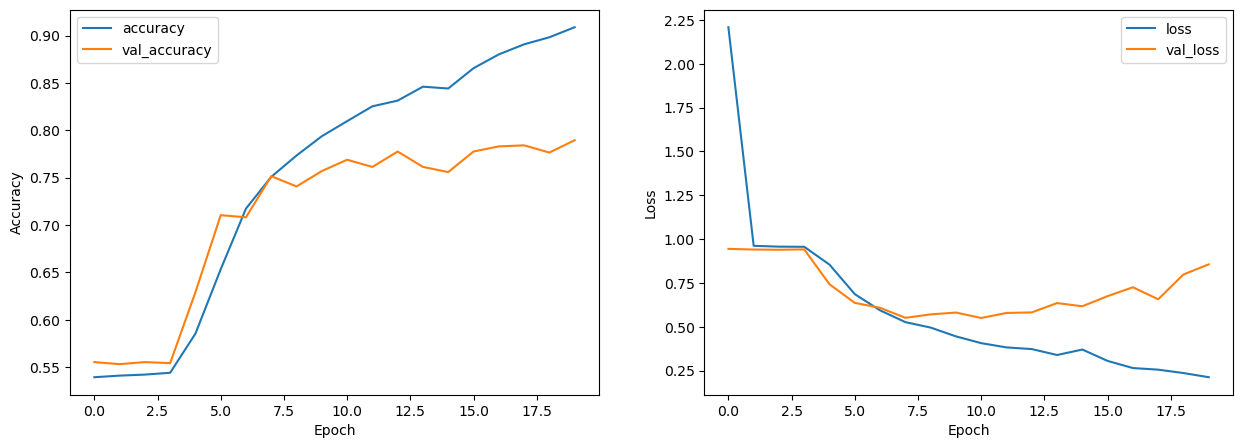

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the training history with figure size and in two diff plots for accuracy and loss
history = np.load('/home/fizzer/enph_ws/src/immitation_learning/models/dirt_track_history2.npy', allow_pickle='TRUE').item()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

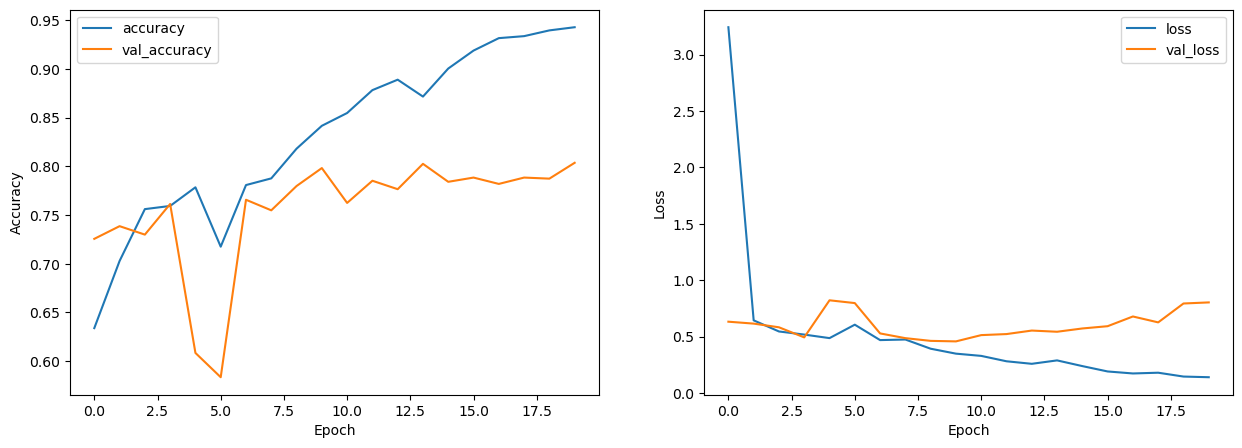

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the training history with figure size and in two diff plots for accuracy and loss
history = np.load('/home/fizzer/enph_ws/src/immitation_learning/models/dirt_track_history1.npy', allow_pickle='TRUE').item()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')